# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 3 - Elliot Linsey

**Table of Contents**

0. Introduction
1. Section 1: Data Preparation
  * Section 1.1: Separating the Region from Area
  * Section 1.2: Assigning each Area Record the Corresponding Region Code
  * Section 1.3: Checking for Missing Data
2. Section 2: Trends for Region
  * Section 2.1: Trends in Detached Prices by Region
  * Section 2.2: Trends in Flat Prices by Region
  * Section 2.3: Direct Comparison of Flat and Detached by Region
  * Section 2.4: Actual Value Movement in Detached and Flat Prices by Region
3. Section 3: Trends for Area 
  * Section 3.1: Finding the Percentage change between July 2017 and July 2018
  * Section 3.2: Plotting Percentage Change
4. Section 4: Statistical Analysis
  * Section 4.1: Concatenation and Cross Tabulation
  * Section 4.2: Chi-Square Test
5. Conclusion

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

## Introduction

Within this paper, we will be investigating the relationship between property prices in the regions of the United Kingdom. There are nine regions, all with constituent areas, these regions are: 
  * East Midlands
  * East of England
  * London
  * North East
  * North West
  * South East
  * South West
  * West Midlands Region
  * Yorkshire and The Humber
  
We will plot graphs to try to identify any trends within the data and between specific property types by region, then calculate the percentage changes of areas within the regions within a specific time frame. Finally, we will perform a statistical test to see whether there is a relationship between the regions and the change in prices over time.

## 1: Preparing and Loading the Data
There are two dataframes we will be using, the average property price which contains all the prices for the specific types of property, organised by area and date. The second dataframe is of location codes for each area, using these we can separate the regions from the areas, as well as assign each area their corresponding region code. 

In [30]:
app = pd.read_csv('average-property-price.csv')
loc_codes = pd.read_csv('location-codes.csv')
display(app)
loc_codes.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


## 1.1: Separating the Region from Area
All region codes begin with 'E12', therefore we can take all rows from the average property price data that have a code beginning with 'E12'. 

In [31]:
region_data = app[app.Code.str[0:3] == 'E12'].copy()
region_data[region_data.Area == 'South West'].head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
5724,01/09/2016,South West,E12000009,366226.9314,238112.5076,197260.0998,157517.6835
5725,01/10/2016,South West,E12000009,362947.1527,236751.6536,195449.6852,157743.8376
5726,01/11/2016,South West,E12000009,368767.4806,237683.2488,195720.4548,158186.7121
5727,01/12/2016,South West,E12000009,365481.7859,236369.0155,195804.8051,158274.0803
5728,01/01/2017,South West,E12000009,369559.0554,239541.7482,197661.2783,159690.6634


## 1.2: Assigning each Area Record the Corresponding Region Code
As the location data contains both each area's specific AuthorityCode as well as overall RegionCode, we can perform a merge function on the Code column of average property price and the AuthorityCode column of location so that each area gets assigned the corresponding RegionCode. We can then drop the extraneous columns. We also convert the date column to a datetime datatype so that we can plot graphs over specific time periods.

In [32]:
app2 = app.merge(loc_codes,left_on='Code',right_on='AuthorityCode').copy()
app2.Date = pd.to_datetime(app2.Date,dayfirst=True)
app2 = app2.drop(columns=['AuthorityCode','AuthorityName','RegionName'],axis=1)
app2

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode
0,2016-09-01,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,E12000001
1,2016-10-01,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,E12000001
2,2016-11-01,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,E12000001
3,2016-12-01,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,E12000001
4,2017-01-01,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,E12000001
...,...,...,...,...,...,...,...,...
5431,2019-04-01,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,E12000005
5432,2019-05-01,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,E12000005
5433,2019-06-01,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,E12000005
5434,2019-07-01,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,E12000005


## 1.3: Checking for Missing Data
The dataframe has a number of missing values from Detached, Semi and Terraced but only in the Area of City of London. All the values for Detached and Semi are missing so we cannot find a summary statistic for these values. As Terraced does have 16 actual values (it's missing 20), I have found the median of these and replaced the null values. This function is not particularly necessary, as later on we will only be focusing on flat and detached properties, however I have included it anyway. 

In [33]:
app2.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
RegionCode     0
dtype: int64

In [34]:
app2_terrace = app2.groupby('Area')['Terraced'].median()
print('Median value for Terraced in City of London = ' + str(app2_terrace['City of London']))

Median value for Terraced in City of London = 1232198.045


In [35]:
app2.Terraced = app2.Terraced.fillna(1232198.045)
app2.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced       0
Flat           0
RegionCode     0
dtype: int64

## 2: Trends for Region
In this section we will look at the prices for both detached and flat properties over the period of 36 months within the nine regions.

In [36]:
region_data.head()
region_data.Date = pd.to_datetime(region_data.Date,dayfirst=True)
region_data.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214


From our region data, we group by the Area and Date and keep the prices as our values. We then pivot these as well as scale them using MinMax scaling to put all the regions into a common range. By using the MinMax scaling function, we are able to see the movement of the region prices in a more directly comparable way. However, we do not have the actual prices as we have confined the variables to fit between 0.0 and 1.0, in this case it is less important as we can still find trends in the data as we are primarily looking at the movement of prices.

## 2.1: Trends in Detached Prices by Region

In [37]:
gby_detached = region_data.groupby(['Area','Date'])['Detached'].sum().reset_index()
gby_pivot_detached = gby_detached.pivot(index='Date', values='Detached', columns='Area')
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
gby_pivot_detached[gby_pivot_detached.columns] = scaler2.fit_transform(gby_pivot_detached)
gby_pivot_detached.head()

Area,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands Region,Yorkshire and The Humber
Date,,,,,,,,,
2016-09-01,0.002074,0.000000,0.096808,0.100689,0.042638,0.000000,0.069343,0.046874,0.000020
2016-10-01,0.000000,0.018336,0.089432,0.119302,0.000000,0.021578,0.000000,0.000000,0.026124
2016-11-01,0.086238,0.059240,0.153560,0.213597,0.059882,0.093818,0.123057,0.107844,0.136121
2016-12-01,0.077672,0.147874,0.162568,0.267924,0.024946,0.081752,0.053589,0.082729,0.163393
2017-01-01,0.045496,0.118192,0.287655,0.000000,0.048157,0.245094,0.139793,0.071448,0.000000


The plots below show the movement in specifically the detached properties within each region from 2016-09-01 to 2019-08-01, a period of 36 months. I have separated the first five regions and remaining 4 regions into the two different plots to prevent either one from being too cluttered, however they both share the same y and x axes ranges so direct comparisons are possible between the two. 

The first and perhaps most noticeable point is that all of the prices increase during this time period, with every region ending in 2019 higher than it began in 2016. All of them except for London end the period on the value of 1.0, the highest scaled value possible, showing a possible continuing upwards trend even past the limit of our dataset. They also all seem to follow the same general shape, with rises and dips being followed at the same times, the difference usually being the severity of said highs and lows. This trend is perhaps most clearly demonstrated in the second plot, with fairly stable prices from September to May of every year, then a rise during the summer until it stabilises again in the winter at this new, higher point. We can see that the end of the data is at the point where another rise starts to take place, we could infer that after this point in September 2019 the prices stabilise. 

Two regions appear to deviate more than the others from this general trend, these being London and the North East. Both of these show quite large fluctuations in prices during this time period with London going from its highest price point in June 2018 to its lowest price point approximately 8 months later, before rapidly climbing up again towards the end of the period. The North East follows a similar pattern to London but with some greater emphasised spikes and dips between November 2017 and April 2018. This raises a question of how are detached properties in London and the North East, both on the opposite ends of the country, related in such a way as to follow extremely similar patterns that are different to the rest of the country? A prime example of this being from around June to October 2018 with the shape being very similar with a sharp rise and fall, a short period of stability then another less steep rise and sharper fall.   

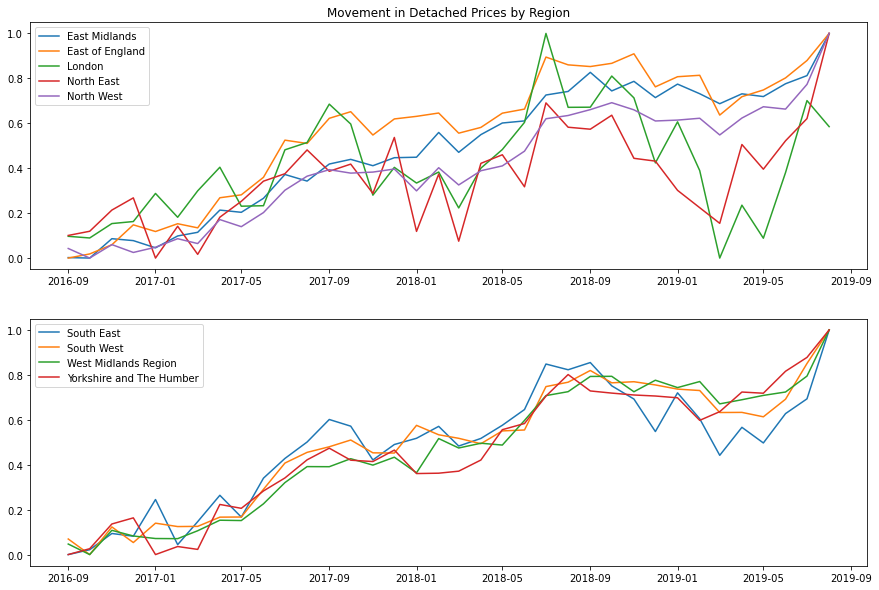

In [38]:
fig, (a1,a2) = plt.subplots(2,1,figsize=(15,10))
a1.set_title('Movement in Detached Prices by Region')
labels1 = gby_pivot_detached.columns[:5]
labels2 = gby_pivot_detached.columns[5:]
a1.plot(gby_pivot_detached.loc[:,gby_pivot_detached.columns[:5]])
a1.legend(labels1)
a2.plot(gby_pivot_detached.loc[:,gby_pivot_detached.columns[5:]])
a2.legend(labels2)
plt.show()

## 2.2: Trends in Flat Prices by Region
We repeat the grouping, pivoting and scaling process with the data for flats. 

In [39]:
gby_flats = region_data.groupby(['Area','Date'])['Flat'].sum().reset_index()
gby_flats.head()
gby_pivot_flats = gby_flats.pivot(index='Date', values='Flat', columns='Area')
gby_pivot_flats.head()
gby_pivot_flats[gby_pivot_flats.columns] = scaler2.fit_transform(gby_pivot_flats)

The flats data seems less uniform than the detached data, with a less obvious general trend. What is shown is that all of the prices do increase by the end of the period, except for London which decreases. This fall in flat prices in London may be related to the Grenfell disaster in June 2017 where you can see prices start to drop, although it does rise again at points it does not appear to recover during this time period, ending August 2019 lower than it began in September 2016. A common dip occurs for all regions around March 2018, this could coincide with the defeat of Theresa May on her flagship Brexit legislation which could make foreign investors less likely to invest in British property (primarily flats), however prices do start to rise again shortly after this point.  

The basic outline of a trend can be more clearly seen in the second plot, with a rise from September 2016 to May 2017, a dip until May 2018 then a slight rise. At this point is where the regions start to diverge around June 2018 with some staying stable (East Midlands, North West, West Midlands Region and Yorkshire and The Humber), some start to descend (East of England, London, South West, South East) and the North East has a massive dip in March 2019 then a sudden significant rise. This is in sharp contrast to the detached plot above as 8 out of 9 of those detached prices ended on 1.0, their highest possible scaled value. None of the flats end the time period on 1.0, therefore we cannot as confidently infer the future movement of the flat prices like we can with the detached prices. Overall the flat prices appear more volatile than the detached prices, with sharper movement than the detached graph and a less clear pattern.

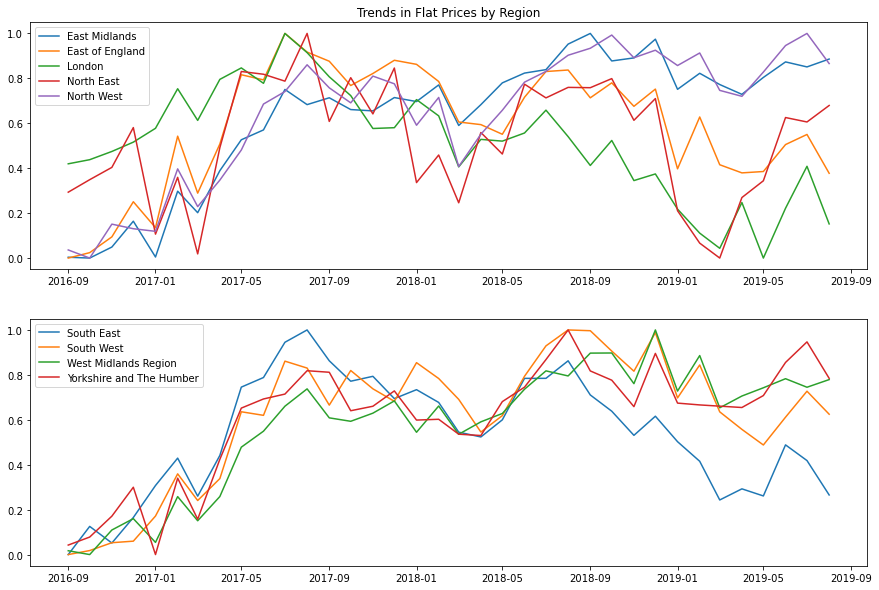

In [40]:
fig, (a1,a2) = plt.subplots(2,1,figsize=(15,10))
labels1 = gby_pivot_flats.columns[:5]
labels2 = gby_pivot_flats.columns[5:]
a1.plot(gby_pivot_flats.loc[:,gby_pivot_flats.columns[:5]])
a1.set_title('Trends in Flat Prices by Region')
a1.legend(labels1)
a2.plot(gby_pivot_flats.loc[:,gby_pivot_flats.columns[5:]])
a2.legend(labels2)
plt.show()

## 2.3: Direct Comparison of Flat and Detached by Region

Below is a direct comparison between flats and detached properties by region over the time period. For the most part we can see that both types of property follow the same trends, both decreasing and increasing at the same time. However we can see that flats appear to have sharper rises than detached due to the flat line being usually above the detached line (e.g the North West). We need to be careful in how we interpret these plots as the actual values are different, but what appears to be happening is that flats are rising faster and higher proportionally in comparison to detached properties. What this may translate to in actual values could be different, as a small increase for a detached property could be equal to or greater than a large increase for a flat. 

There are a few specific moments, primarily at the end of the time frame where the two lines move in opposite directions. One being the East of England where detached prices continue to rise whilst flats start to fall, other instances of this can be seen in South East, North West, South West and Yorkshire and The Humber.  

What we could infer from these plots is that the prices of both flats and detached properties are affected by the same or similar variables, due to the overall extremely similar movements of the lines. I've investigated this further by determining the correlation between the two variables. What this tells us is that all the regions are positively correlated between flats and detached properties, with East Midlands having the highest at 0.91 and London having the lowest at 0.19. However, while they appear to be correlated this must not be confused with causation as it is unlikely that the prices of flats will significantly determine the prices of detached and vice versa. What is more likely to be happening is that there is a confounding variable that is affecting both types of property, causing them to appear correlated to one another. It would make more sense that an event that occurs in the region would affect all the property prices, regardless of type. Specific examples such as Grenfell Tower in London could explain why only flat prices in that region decreased more extremely whilst detached prices moved differently, this would also explain the lower correlation score for this region. 


<ipython-input-41-4d8d8da0c53f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,0].set_xticklabels(labels,rotation=45),axs[2,1].set_xticklabels(labels,rotation=45),axs[2,2].set_xticklabels(labels,rotation=45)


<Figure size 432x288 with 0 Axes>

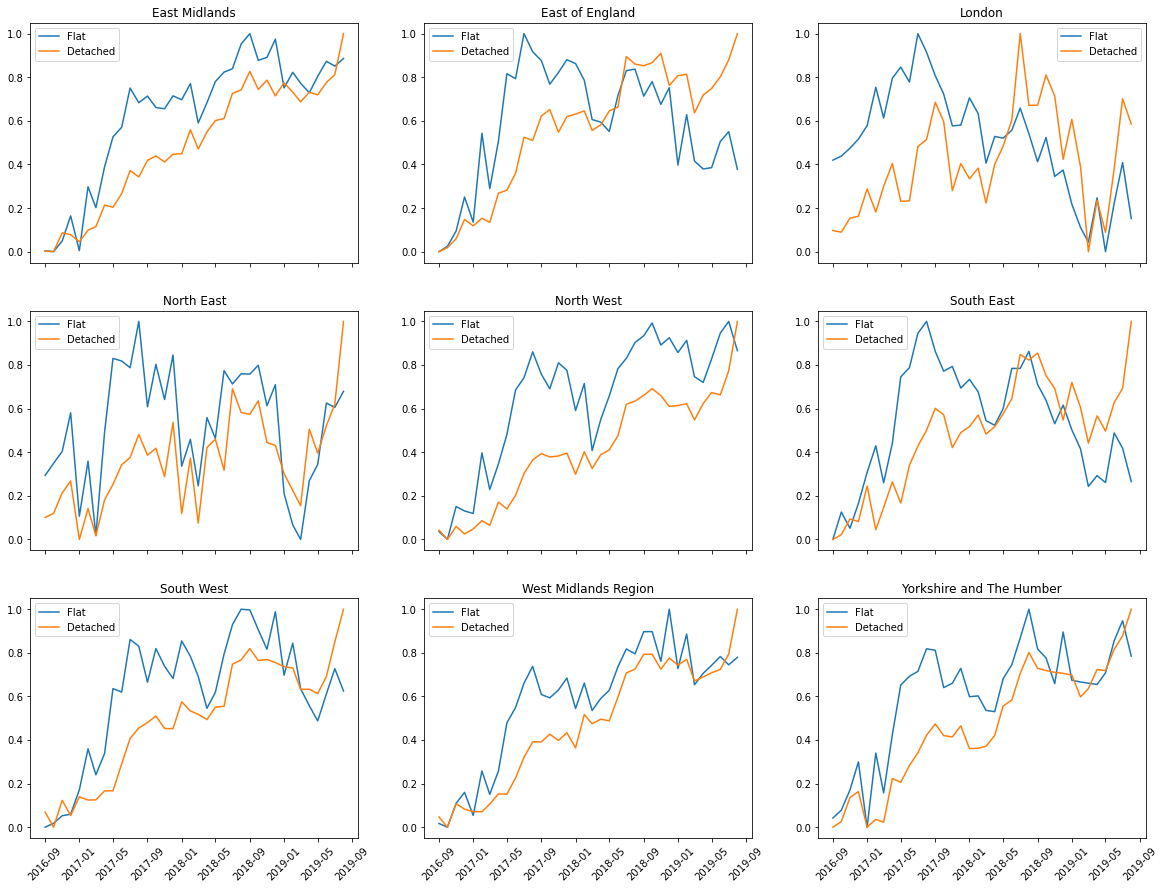

In [41]:
plt.clf()
labels = ['2016-09','2017-01','2017-05','2017-09','2018-01','2018-05','2018-09','2019-01','2019-05','2019-09']
fig, axs, = plt.subplots(3,3,figsize=(20,15), sharex=True)
axs[0,0].plot(gby_pivot_flats.index, gby_pivot_flats['East Midlands'],label='Flat'),axs[0,0].plot(gby_pivot_flats.index, gby_pivot_detached['East Midlands'],label='Detached')
axs[0,1].plot(gby_pivot_flats.index, gby_pivot_flats['East of England'],label='Flat'),axs[0,1].plot(gby_pivot_flats.index, gby_pivot_detached['East of England'],label='Detached')
axs[0,2].plot(gby_pivot_flats.index, gby_pivot_flats.London,label='Flat'),axs[0,2].plot(gby_pivot_flats.index, gby_pivot_detached.London,label='Detached')
axs[1,0].plot(gby_pivot_flats.index, gby_pivot_flats['North East'],label='Flat'),axs[1,0].plot(gby_pivot_flats.index, gby_pivot_detached['North East'],label='Detached')
axs[1,1].plot(gby_pivot_flats.index, gby_pivot_flats['North West'],label='Flat'),axs[1,1].plot(gby_pivot_flats.index, gby_pivot_detached['North West'],label='Detached')
axs[1,2].plot(gby_pivot_flats.index, gby_pivot_flats['South East'],label='Flat'),axs[1,2].plot(gby_pivot_flats.index, gby_pivot_detached['South East'],label='Detached')
axs[2,0].plot(gby_pivot_flats.index, gby_pivot_flats['South West'],label='Flat'),axs[2,0].plot(gby_pivot_flats.index, gby_pivot_detached['South West'],label='Detached')
axs[2,1].plot(gby_pivot_flats.index, gby_pivot_flats['West Midlands Region'],label='Flat'),axs[2,1].plot(gby_pivot_flats.index, gby_pivot_detached['West Midlands Region'],label='Detached')
axs[2,2].plot(gby_pivot_flats.index, gby_pivot_flats['Yorkshire and The Humber'],label='Flat'),axs[2,2].plot(gby_pivot_flats.index, gby_pivot_detached['Yorkshire and The Humber'],label='Detached')
axs[2,0].set_xticklabels(labels,rotation=45),axs[2,1].set_xticklabels(labels,rotation=45),axs[2,2].set_xticklabels(labels,rotation=45)
axs[0,0].legend(),axs[0,1].legend(),axs[0,2].legend(),axs[1,0].legend(),axs[1,1].legend(),axs[1,2].legend(),axs[2,0].legend(),axs[2,1].legend(),axs[2,2].legend()
axs[0,0].set_title('East Midlands'),axs[0,1].set_title('East of England'),axs[0,2].set_title('London'),axs[1,0].set_title('North East'),axs[1,1].set_title('North West'),axs[1,2].set_title('South East'),
axs[2,0].set_title('South West'),axs[2,1].set_title('West Midlands Region'),axs[2,2].set_title('Yorkshire and The Humber'),
plt.show()

In [42]:
print('East Midlands flat and detached correlation: ' + str(round(gby_pivot_flats['East Midlands'].corr(gby_pivot_detached['East Midlands']),2)))
print('East of England flat and detached correlation: ' + str(round(gby_pivot_flats['East of England'].corr(gby_pivot_detached['East of England']),2)))
print('London flat and detached correlation: ' + str(round(gby_pivot_flats['London'].corr(gby_pivot_detached['London']),2)))
print('North East flat and detached correlation: ' + str(round(gby_pivot_flats['North East'].corr(gby_pivot_detached['North East']),2)))
print('North West flat and detached correlation: ' + str(round(gby_pivot_flats['North West'].corr(gby_pivot_detached['North West']),2)))
print('South East flat and detached correlation: ' + str(round(gby_pivot_flats['South East'].corr(gby_pivot_detached['South East']),2)))
print('South West flat and detached correlation: ' + str(round(gby_pivot_flats['South West'].corr(gby_pivot_detached['South West']),2)))
print('West Midlands Region flat and detached correlation: ' + str(round(gby_pivot_flats['West Midlands Region'].corr(gby_pivot_detached['West Midlands Region']),2)))
print('Yorkshire and The Humber flat and detached correlation: ' + str(round(gby_pivot_flats['Yorkshire and The Humber'].corr(gby_pivot_detached['Yorkshire and The Humber']),2)))

East Midlands flat and detached correlation: 0.91
East of England flat and detached correlation: 0.53
London flat and detached correlation: 0.19
North East flat and detached correlation: 0.63
North West flat and detached correlation: 0.88
South East flat and detached correlation: 0.47
South West flat and detached correlation: 0.79
West Midlands Region flat and detached correlation: 0.9
Yorkshire and The Humber flat and detached correlation: 0.85


## 2.4: Actual Value Movement in Detached and Flat Prices by Region

Above, we have been dealing with normalised values using the MinMax scaler. Below, we gain a zoomed out view of all the regions using their actual values. Within these plots it is difficult to make any specific value comparisons, however a number of observations can be made. One being that the orders of price for both detached and flats are very similar for the regions, with London being the most expensive and the North East being the least. We can also see that the difference in price between flats and detached properties by the regions aren't always the same. For example, if we use London prices as a threshold, the South East detached prices are approximately 55% to 60% of the prices of London detached properties, whereas the South East flats are around 45% to 50% of the London flats. This could mean that detached properties in the South East are seen as slightly more desirable than flats in the South East and fetch a proportionally higher price. 

We can also see that the detached prices are more spread out compared to the flat prices, with a greater difference between the West Midlands Region and Yorkshire and The Humber, with the East Midlands and the North West sandwiched in between. On the other hand, the flat prices for these regions are far more squashed together. This could be due to detached properties having higher prices and therefore a greater range of values than flats or like above, detached could be seen as proportionally more desirable than flats in these areas and therefore command higher prices. 

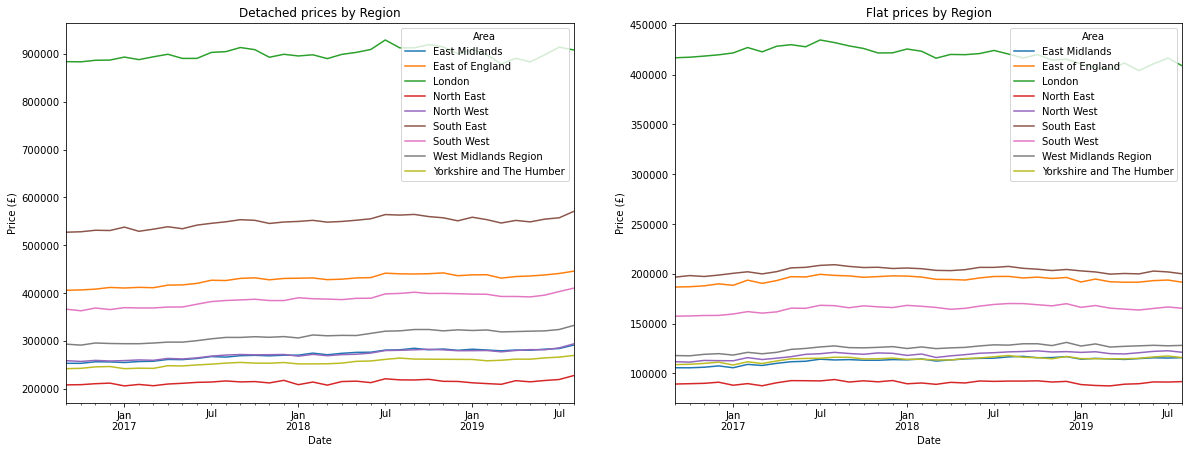

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
gby_pivot_detached2 = gby_detached.pivot(index='Date', values='Detached', columns='Area')
gby_pivot_detached2.loc[::].plot(ax=ax1)
ax1.set_ylabel('Price (£)')
ax1.set_title('Detached prices by Region')
gby_pivot_flat2 = gby_flats.pivot(index='Date', values='Flat', columns='Area')
gby_pivot_flat2.loc[::].plot(ax=ax2)
ax2.set_ylabel('Price (£)')
ax2.set_title('Flat prices by Region')
plt.show()

## 3: Trends for Area
In this section we will take a deeper look into the specific areas within regions and see whether any differences or similarities can be found between the time period of July 2017 to July 2018.

Firstly, we separate each region into a separate dataframe containing all of its constituent areas. 

In [44]:
NE = app2[app2.RegionCode == 'E12000001'].copy()
NW = app2[app2.RegionCode == 'E12000002'].copy()
YH = app2[app2.RegionCode == 'E12000003'].copy()
EM = app2[app2.RegionCode == 'E12000004'].copy()
WMR = app2[app2.RegionCode == 'E12000005'].copy()
EOE = app2[app2.RegionCode == 'E12000006'].copy()
LDN = app2[app2.RegionCode == 'E12000007'].copy()
SE = app2[app2.RegionCode == 'E12000008'].copy()
SW = app2[app2.RegionCode == 'E12000009'].copy()
NE.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode
0,2016-09-01,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,E12000001
1,2016-10-01,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,E12000001
2,2016-11-01,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,E12000001
3,2016-12-01,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,E12000001
4,2017-01-01,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,E12000001


## 3.1: Finding the Percentage change between July 2017 and July 2018
We then define a function that can convert these dataframes into pivot tables, using Area as the columns, Date as the index and the Flat values as values. Then we can find the percentage change between July 2017 and July 2018 and sort these from lowest to highest.

In [45]:
def df_creator(df):
    df_pivot = df.pivot(index='Date', columns='Area', values='Flat')
    df_ch = ((df_pivot.loc['2018-07-01']-df_pivot.loc['2017-07-01'])/df_pivot.loc['2017-07-01'])*100
    df_ch = df_ch.sort_values()
    df_ch = df_ch.reset_index().rename(columns={0:'Percentage Change'})
    return df_ch

In [46]:
NE_ch = df_creator(NE)
NW_ch = df_creator(NW)
YH_ch = df_creator(YH)
EM_ch = df_creator(EM)
WMR_ch = df_creator(WMR)
EOE_ch = df_creator(EOE)
LDN_ch = df_creator(LDN)
SE_ch = df_creator(SE)
SW_ch = df_creator(SW)
LDN_ch.head()

,Area,Percentage Change
0,City of Westminster,-9.062470
1,Southwark,-6.059867
2,City of London,-5.369204
3,Greenwich,-5.257209
4,Wandsworth,-4.925666


## 3.2: Plotting Percentage Change

Using all these tables we can plot multiple bar charts detailing the percentage change for each area within each specific region for flats. We can immediately see and estimate the price performance during this period for an entire region by looking at these area percentage changes. For example, the North East has proportionally the most negative percentage changes over all the regions. If we look back at the line graphs above, we can see that it started July 2017 around its highest value but a year later in July 2018 it had dropped to about 0.5, halving its previous value and agreeing with the bar chart that the majority of its areas must have lost value during this time. 

On the other hand, the East Midlands is the exact opposite, with all positive percentage changes and a very quickly rising line graph above. However, what this chart cannot tell us are the actual values associated with the percentage changes, we can however get an estimation of the shape of the data. Both Yorkshire and The Humber and East of England have similar bar charts, approximately half positive and half negative. Looking at their corresponding line graphs above (2.3) for comparing flat and detached prices we can see that during this period of time, both these regions look and move very similarly. The same goes for East Midlands and West Midlands Region. 

The information these plots give us is slightly deeper but also still intuitively understandable like the line graphs above. From it we can estimate that regions such as the East and West Midlands Regions saw the price increase overall as many of their areas increased. We could estimate that those with a similar number of both positive and negative regions such as Yorkshire and The Humber and East of England were probably fairly stable and did not see as much movement. We could also estimate that regions that saw large negative percentage changes in their areas saw a large drop overall in prices, such as the North East. We must be careful of our use of percentage changes, as there is a chance of misinterpreting these results. A large positive percentage change in a high priced area could override multiple percentage changes in lower priced areas, but from looking at the bars you would assume an overall negative change. For example, a percentage change in the City of Westminster in London may be more important than a similar percentage change in Hounslow due to the large difference in average flat prices. 

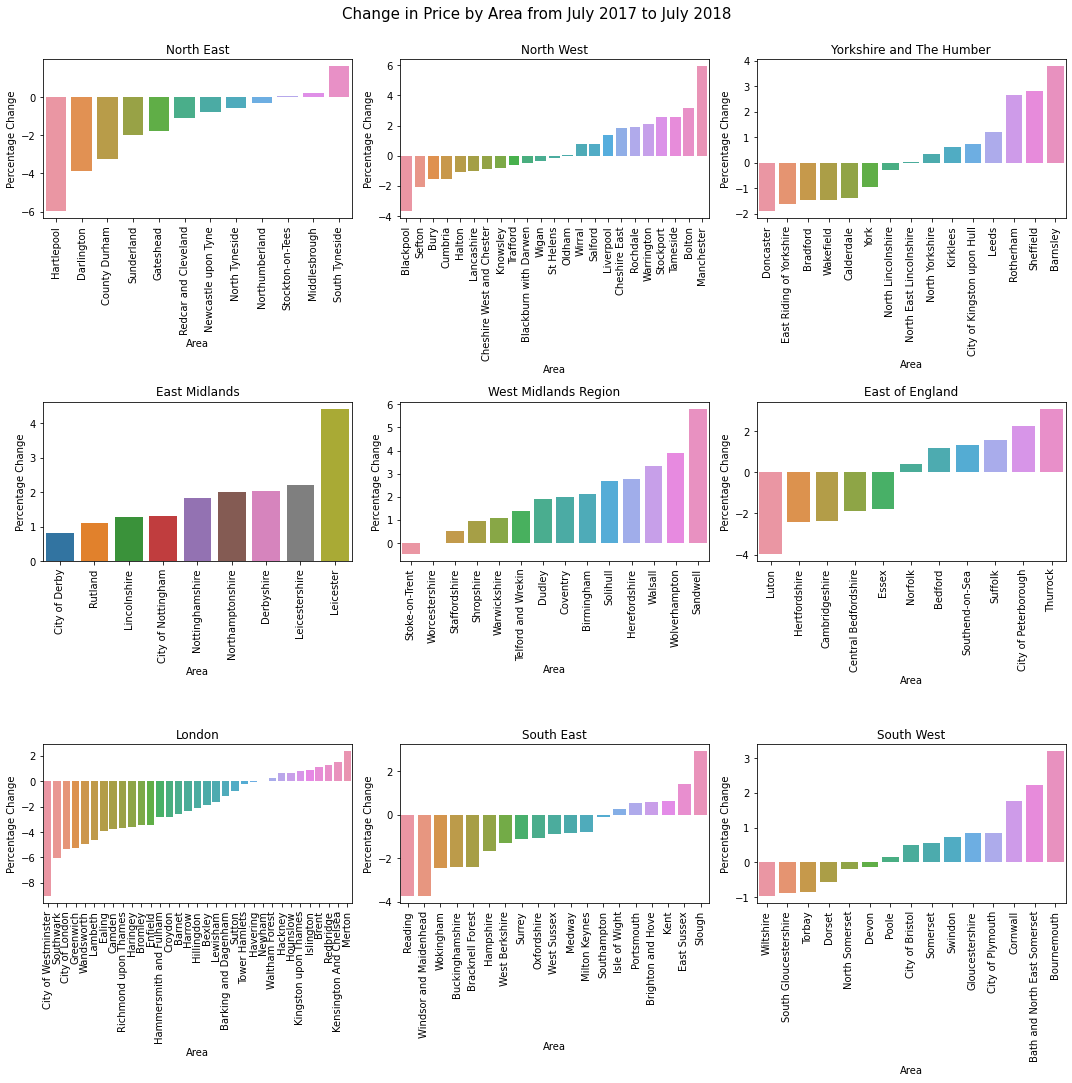

In [47]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,15))
ax1 = sns.barplot(data=NE_ch, x='Area',y='Percentage Change',ax=ax1)
ax1.set_title('North East')
ax1.set_xticklabels(labels=NE_ch.Area,rotation=90)
ax2 = sns.barplot(data=NW_ch, x='Area',y='Percentage Change',ax=ax2)
ax2.set_title('North West')
ax2.set_xticklabels(labels=NW_ch.Area,rotation=90)
ax3 = sns.barplot(data=YH_ch, x='Area',y='Percentage Change',ax=ax3)
ax3.set_title('Yorkshire and The Humber')
ax3.set_xticklabels(labels=YH_ch.Area,rotation=90)
ax4 = sns.barplot(data=EM_ch, x='Area',y='Percentage Change',ax=ax4)
ax4.set_title('East Midlands')
ax4.set_xticklabels(labels=EM_ch.Area,rotation=90)
ax5 = sns.barplot(data=WMR_ch, x='Area',y='Percentage Change',ax=ax5)
ax5.set_title('West Midlands Region')
ax5.set_xticklabels(labels=WMR_ch.Area,rotation=90)
ax6 = sns.barplot(data=EOE_ch, x='Area',y='Percentage Change',ax=ax6)
ax6.set_title('East of England')
ax6.set_xticklabels(labels=EOE_ch.Area,rotation=90)
ax7 = sns.barplot(data=LDN_ch, x='Area',y='Percentage Change',ax=ax7)
ax7.set_title('London')
ax7.set_xticklabels(labels=LDN_ch.Area,rotation=90)
ax8 = sns.barplot(data=SE_ch, x='Area',y='Percentage Change',ax=ax8)
ax8.set_title('South East')
ax8.set_xticklabels(labels=SE_ch.Area,rotation=90)
ax9 = sns.barplot(data=SW_ch, x='Area',y='Percentage Change',ax=ax9)
ax9.set_title('South West')
ax9.set_xticklabels(labels=SW_ch.Area,rotation=90)
plt.suptitle('Change in Price by Area from July 2017 to July 2018',fontsize=15,y=1)
plt.tight_layout()

## 4: Statistical Analysis
In this section we will perform a chi-square test on our data to see whether the price changes have affected all regions similarly. Our null hypothesis is that there is no relation between the regions and percentage changes and that all regions are independent. Our alpha value is 5%. 

Firstly, we define a function that creates a column that returns either 'Negative' or 'Positive' if the corresponding value for the percentage change is positive or negative. We then apply this to all of our previous area dataframes.

In [48]:
def pos_neg(df):
    df['pos_neg'] = df['Percentage Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
    return df
SW_ch, NE_ch, NW_ch, YH_ch, EM_ch, WMR_ch, EOE_ch, LDN_ch, SE_ch = map(pos_neg, (SW_ch, NE_ch, NW_ch, YH_ch, EM_ch, WMR_ch, EOE_ch, LDN_ch, SE_ch))

## 4.1: Concatenation and Cross Tabulation
We then reintroduce the Region Code column to our area dataframes, except instead of using the codes we use the actual names for clarity. We then concatenate these dataframes back into one large dataframe and perform a crosstab using the region codes and positive or negative column. 

In [49]:
SW_ch['Region Code'] = 'South West'
NE_ch['Region Code'] = 'North East'
NW_ch['Region Code'] = 'North West'
YH_ch['Region Code'] = 'Yorkshire and The Humber'
EM_ch['Region Code'] = 'East Midlands'
WMR_ch['Region Code'] = 'West Midlands Region'
EOE_ch['Region Code'] = 'East of England'
LDN_ch['Region Code'] = 'London'
SE_ch['Region Code'] = 'South East'
conked = pd.concat([SW_ch, NE_ch, NW_ch, YH_ch, EM_ch, WMR_ch, EOE_ch, LDN_ch, SE_ch]).reset_index(drop=True)
display(conked)
tabs = pd.crosstab(conked['Region Code'],conked.pos_neg)
tabs

,Area,Percentage Change,pos_neg,Region Code
0,Wiltshire,-0.970748,Negative,South West
1,South Gloucestershire,-0.867653,Negative,South West
2,Torbay,-0.842087,Negative,South West
3,Dorset,-0.574815,Negative,South West
4,North Somerset,-0.194531,Negative,South West
...,...,...,...,...
146,Portsmouth,0.558416,Positive,South East
147,Brighton and Hove,0.583089,Positive,South East
148,Kent,0.619002,Positive,South East
149,East Sussex,1.412510,Positive,South East


pos_neg,Negative,Positive
Region Code,,
East Midlands,0,9
East of England,5,6
London,23,10
North East,9,3
North West,12,11
South East,13,6
South West,6,9
West Midlands Region,2,12
Yorkshire and The Humber,7,8


## 4.2: Chi-Square Test

Here we perform the chi-square test using the above crosstab. It returns a p-value of 0.06% which falls well below our alpha value of 5%. Our test statistic is 27.6, using a chi-square table we find the value for a 5% alpha value with 8 degrees of freedom is 15.507 which our test stastistic is comfortably above. Therefore, we can accept the alternative hypothesis that there is a relationship between the regions and percentage change and they are not independent. We can see from the expected values array that our crosstab table varies quite strongly in some of the regions, for example we would expect around 16 negative and positive results for London if there was no relation, however the actual values are 23 negative and 10 positive. Essentially, what our expected values are were an even split between positive and negative percentage changes per region which is what we did not receive for the majority of regions. 

What this tells us is that some regions are affected differently, however the chi-square test does not tell us what variable causes this effect. It also fails to tell us the magnitude of the difference, if we look above to the line graphs with the regions actual values (2.4), we can see that all the regions are fairly steady with no large fluctuations, so this result may not be something we should act on as the actual difference may be negligible. 

In [50]:
from scipy.stats import chi2_contingency
print('Test statistic: ' + str(round(chi2_contingency(tabs)[0],2)))
print('P-value: ' + str(round(chi2_contingency(tabs)[1]*100,2))+'%')
print('Expected Values: \n' + str(chi2_contingency(tabs)[3]))

Test statistic: 27.6
P-value: 0.06%
Expected Values: 
[[ 4.58940397  4.41059603]
 [ 5.60927152  5.39072848]
 [16.82781457 16.17218543]
 [ 6.1192053   5.8807947 ]
 [11.72847682 11.27152318]
 [ 9.68874172  9.31125828]
 [ 7.64900662  7.35099338]
 [ 7.13907285  6.86092715]
 [ 7.64900662  7.35099338]]


## Conclusion

This paper has found a number of trends and relationships within the flat and detached prices in the regions of the United Kingdom. The major trend appearing to be that both types of property will tend to increase and decrease together over time and regardless of region (2.1, 2.2). However, events in specific regions can cause divergences such as the potential effect of Grenfell Tower on London flats in 2017 causing it to decrease more rapidly than other regions. It also appears that all regions can be affected by the same events such as the common dip in flat prices in April 2018 as well as the common rises and stabilisations of detached prices throughout the period. 

In the direct comparison of flats and detached prices (2.3) we found that flats tend to rise and fall sharper than detached, however they were more difficult to predict with flats all diverging at the end of the period, whilst the majority of detached hit their highest price and were most likely about to stabilise as we entered the winter quarter. 

The use of these normalised values were effective at showing trends that we could compare, however when we plotted the actual values (2.4) we saw that these rises and falls translated to actually quite small variations in price and that all of the regions were fairly steady. 

In investigating the areas for flat prices (3.2) we gained a more in-depth look within the regions. We found that some regions had very positive percentage increase for their areas, whilst others had majority negative change and others appeared to be split evenly. These allowed us to estimate the shapes and the movement of the regions as a whole, but due to our use of percentages we lacked the ability to make accurate realisations due to the varying prices for area within each region, specifically for regions such as London that have a large variety of area prices. 

Finally, we performed a chi-square test, the results of which told us that the regions and percentage changes were not independent and that there is a relationship. However, it does not tell us what causes this relationship or the magnitude that this significant difference can incur. Looking back at 2.4 it would appear that this difference may not be that important due to the steadiness of the house prices during this period. 

Overall, it therefore appears that both flat and detached prices are affected by an outside variable or variables, however we do not know what these variables are. We have made some inferences such as Grenfell Tower and Brexit but these cannot be confirmed from within this data. What the data does show is that the majority of both flat and detached prices will move together all over the country and with similar steepness levels, depending on whether they are a flat or detached. We have also found that some variables will affect property prices differently, such as the common dip with flats in April 2018 not being present or as noticeable in detached. We must also be careful with the interpretation of some of this data, as the use of normalisation or percentage change does not give us the actual value, so movement can be deemed larger or smaller than it actually is. 

Thanks for reading! 

Elliot Linsey, QMUL